1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


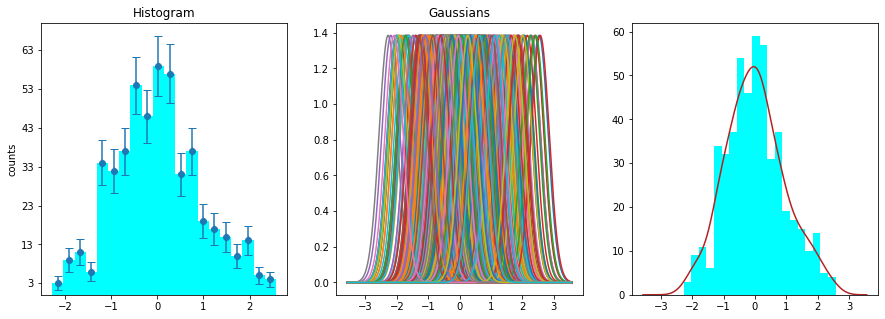

In [1]:
import numpy as np
import numpy.random as npr
from scipy.stats import norm
from scipy.integrate import trapz
import matplotlib.pyplot as plt


mu, sigma = 0, 1 # mean and standard deviation
x = npr.normal(mu, sigma, 500)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

n, bins, _ = ax1.hist(x, bins=20, color= 'cyan')
step=bins[1]-bins[0]
ax1.set_ylabel('counts')
ax1.set_title('Histogram')

ax1.set_yticks(np.arange(min(n), 2*max(n), 10.0))

mean_bins = 1/2 * ( bins[1:]+bins[:-1])
err = np.sqrt(np.abs(n))
ax1.errorbar(mean_bins, n, xerr = 0, yerr = err, fmt='o',capthick=1, capsize=4)


k = np.arange(-(max(x)+1),(max(x)+1),0.01)
std = 1.06*x.std()*np.power(len(x),-1/5)
ax2.set_title('Gaussians')
[ax2.plot(k,norm.pdf(k,x[i],scale = std)) for i in range(len(x))]

y=np.sum([norm.pdf(k,x[i],scale=std) for i in range(len(x))],axis=0)
ax3.plot(k,(y)*step*500/np.trapz(y,k),color = 'firebrick')
ax3.hist(x, bins=20,color = 'cyan')

plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

In [ ]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

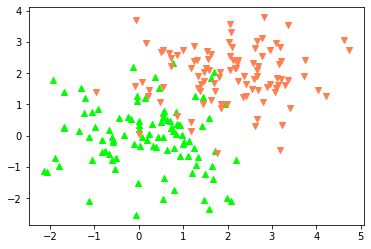

In [2]:
def dataset2D(mean,std):
    x = npr.normal(mean,sigma,100)
    y = npr.normal(mean,sigma,100)
    return (x,y)

first_cat_x, first_cat_y = dataset2D(0,1)
second_cat_x, second_cat_y = dataset2D(2,1)

plt.scatter(first_cat_x,first_cat_y,marker='^', c = 'lime')
plt.scatter(second_cat_x,second_cat_y,marker='v', c = 'coral')

plt.show()


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

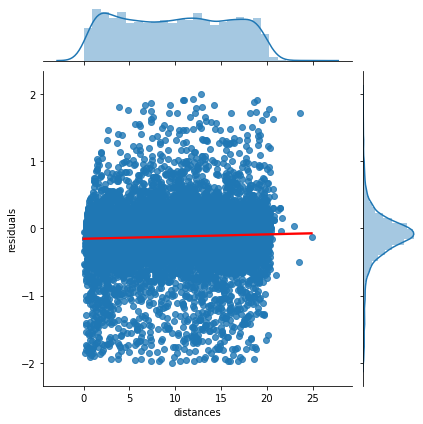

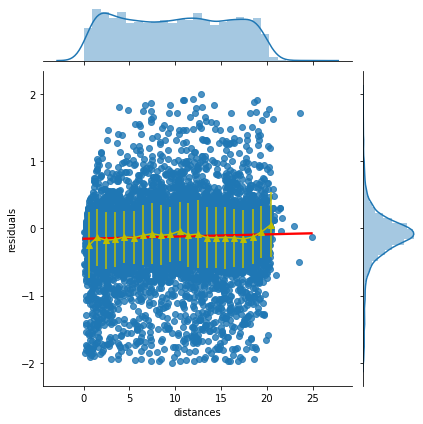

In [48]:
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import linregress

data=np.load('residuals_261.npy',allow_pickle=True)
dt= pd.DataFrame(data.item())
dt = dt[np.abs(dt['residuals'])<2]
dt
slope, intercept, r_value, p_value, std_err = stats.linregress(dt['residuals'], dt['distances'])
plot = sns.jointplot(x="distances", y="residuals", data=dt, kind= "reg",joint_kws={'line_kws':{'color':'r'}})


#dt = dt[dt['distances']<20]
x=np.arange(0,21,1)
dt['bins']=np.digitize(dt['distances'], x)
mean=dt.groupby(['bins']).mean()
std=dt.groupby(['bins']).std()
x=mean['distances']
y=mean['residuals']
erry=std['residuals']
plot = sns.jointplot(x="distances", y="residuals", data=dt, kind= "reg",joint_kws={'line_kws':{'color':'r'}})
plt.errorbar(x,y,yerr=erry, color='y',marker ='^')
plt.show()